# Exploratory Data Analysis <br>
In this notebook, we provide an overview of the data set and analyze it in more detail in order to draw conclusions for the development of the automated pipelines.

Data set:
This repository holds the data from a cohort of pediatric patients with suspected appendicitis admitted with abdominal pain to Children’s Hospital St. Hedwig in Regensburg, Germany, between 2016 and 2021. Each patient has (potentially multiple) ultrasound (US) images, aka views, tabular data comprising laboratory, physical examination, scoring results and ultrasonographic findings extracted manually by the experts, and three target variables, namely, diagnosis, management and severity.
Source:https://archive.ics.uci.edu/dataset/938/regensburg+pediatric+appendicitis 

In [1]:
!pip install openpyxl
!pip install matplotlib
!pip install seaborn
!pip install shap scikit-learn
!pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 4.0 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 12.8 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 40.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 MB 25.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 52.9 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 6.1 MB/s eta 0:00:00ta 0:00:01


In [2]:
#Import the dataset
import pandas as pd
data = pd.read_excel("./data/app_data.xlsx")

#Print out the number of rows and columns in the data frame
data.shape

(782, 58)

In [3]:
#Show number of non-null entries, data types of each column, and memory usage
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 58 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               781 non-null    float64
 1   BMI                               755 non-null    float64
 2   Sex                               780 non-null    object 
 3   Height                            756 non-null    float64
 4   Weight                            779 non-null    float64
 5   Length_of_Stay                    778 non-null    float64
 6   Management                        781 non-null    object 
 7   Severity                          781 non-null    object 
 8   Diagnosis_Presumptive             780 non-null    object 
 9   Diagnosis                         780 non-null    object 
 10  Alvarado_Score                    730 non-null    float64
 11  Paedriatic_Appendicitis_Score     730 non-null    float64
 12  Appendix

In [4]:
#Show the first rows of the data frame
data.head()

,Age,BMI,Sex,Height,Weight,Length_of_Stay,Management,Severity,Diagnosis_Presumptive,Diagnosis,...,Abscess_Location,Pathological_Lymph_Nodes,Lymph_Nodes_Location,Bowel_Wall_Thickening,Conglomerate_of_Bowel_Loops,Ileus,Coprostasis,Meteorism,Enteritis,Gynecological_Findings
0,12.68,16.9,female,148.0,37.0,3.0,conservative,uncomplicated,appendicitis,appendicitis,...,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14.10,31.9,male,147.0,69.5,2.0,conservative,uncomplicated,appendicitis,no appendicitis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN
2,14.14,23.3,female,163.0,62.0,4.0,conservative,uncomplicated,appendicitis,no appendicitis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,yes,NaN
3,16.37,20.6,female,165.0,56.0,3.0,conservative,uncomplicated,appendicitis,no appendicitis,...,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,yes,NaN
4,11.08,16.9,female,163.0,45.0,3.0,conservative,uncomplicated,appendicitis,appendicitis,...,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,yes,NaN


In [5]:
#Describe function on the numerical columns of the dataFrame
data.describe() 

,Age,BMI,Height,Weight,Length_of_Stay,Alvarado_Score,Paedriatic_Appendicitis_Score,Appendix_Diameter,Body_Temperature,WBC_Count,Neutrophil_Percentage,Segmented_Neutrophils,RBC_Count,Hemoglobin,RDW,Thrombocyte_Count,CRP,US_Number
count,781.000000,755.000000,756.000000,779.000000,778.000000,730.000000,730.000000,498.000000,775.000000,776.000000,679.000000,54.000000,764.000000,764.000000,756.000000,764.000000,771.000000,760.000000
mean,11.346483,18.906916,148.017460,43.172542,4.284062,5.921918,5.253425,7.762651,37.404516,12.670683,71.791163,64.929630,4.799490,13.380497,13.180291,285.252618,31.387899,425.515789
std,3.529979,4.385252,19.732016,17.390984,2.574057,2.155972,1.958456,2.536671,0.903678,5.366525,14.463656,15.085025,0.499012,1.393271,4.538774,72.494373,57.433588,271.585211
min,0.000000,7.827983,53.000000,3.960000,1.000000,0.000000,0.000000,2.700000,26.900000,2.600000,27.200000,32.000000,3.620000,8.200000,11.200000,91.000000,0.000000,1.000000
25%,9.200000,15.725294,137.000000,29.500000,3.000000,4.000000,4.000000,6.000000,36.800000,8.200000,61.400000,54.500000,4.537500,12.600000,12.300000,236.000000,1.000000,198.750000
50%,11.438741,18.062284,149.650000,41.400000,3.000000,6.000000,5.000000,7.500000,37.200000,12.000000,75.500000,64.500000,4.780000,13.300000,12.700000,276.000000,7.000000,398.500000
75%,14.099932,21.179011,163.000000,54.000000,5.000000,8.000000,7.000000,9.100000,37.900000,16.200000,83.600000,77.500000,5.020000,14.000000,13.300000,330.000000,33.000000,613.250000
max,18.360000,38.156221,192.000000,103.000000,28.000000,10.000000,10.000000,17.000000,40.200000,37.700000,97.700000,91.000000,14.000000,36.000000,86.900000,708.000000,365.000000,992.000000


-> The variable US_Number is a unique identification number of the ultrasound image for each individual patient. Therefore, this variable is not relevant for the prediction and must be removed from the data set.

In [6]:
#Describe function on the non-numerical columns of the X_train data frame

description = data.describe(include = "object")

sorted_description = description.T.sort_values(by='unique', ascending=False).T

sorted_description

,Lymph_Nodes_Location,Diagnosis_Presumptive,Gynecological_Findings,Abscess_Location,Perfusion,Management,Perforation,Stool,WBC_in_Urine,RBC_in_Urine,...,Loss_of_Appetite,Nausea,Coughing_Pain,Contralateral_Rebound_Tenderness,Lower_Right_Abd_Pain,Migratory_Pain,Appendix_on_US,Diagnosis,Severity,Ipsilateral_Rebound_Tenderness
count,121,780,26,13,63,781,81,765,583,576,...,772,774,766,767,774,773,777,780,781,619
unique,26,16,14,7,4,4,4,4,4,4,...,2,2,2,2,2,2,2,2,2,2
top,mesenterial,appendicitis,keine,Douglas,hyperperfused,conservative,no,normal,no,no,...,yes,yes,no,no,yes,no,yes,appendicitis,uncomplicated,no
freq,37,682,9,6,31,483,34,549,501,442,...,392,453,548,469,733,562,504,463,662,581


- Severity, management and diagnosis are the predefined target variables of the dataset. Our aim in answering the statement of the problem is to predict the target variable "Diagnosis". For an initial analysis, however, we want to take a little closer look at all target variables. In order to clearly separate target and features, we split the data set into both. In the ongoing data analysis, we will then focus in particular on the target variable "Diagnosis".
- The features "Lymph_Nodes_Location", "Abscess_Location", "Gynecological_Findings", "Diagnosis_Presumptive" are free text fields in the data set. These have a very high number of unique values and are therefore very inconsistent, making them unsuitable for predicting diagnosis.
- The "Length_of_Stay" feature is only recorded after the patient has been discharged and is therefore not suitable for a diagnosis.

In [7]:
#Delete the previously identified features
target = data[["Severity", "Management", "Diagnosis"]]
features = data.drop(columns=["US_Number", "Diagnosis", "Severity", "Management", "Length_of_Stay", "Lymph_Nodes_Location", "Abscess_Location", "Gynecological_Findings", "Diagnosis_Presumptive"])
#data = data.dropna(subset=["Diagnosis"])

Here we take a look at the values of the predefined target variables from the data set.

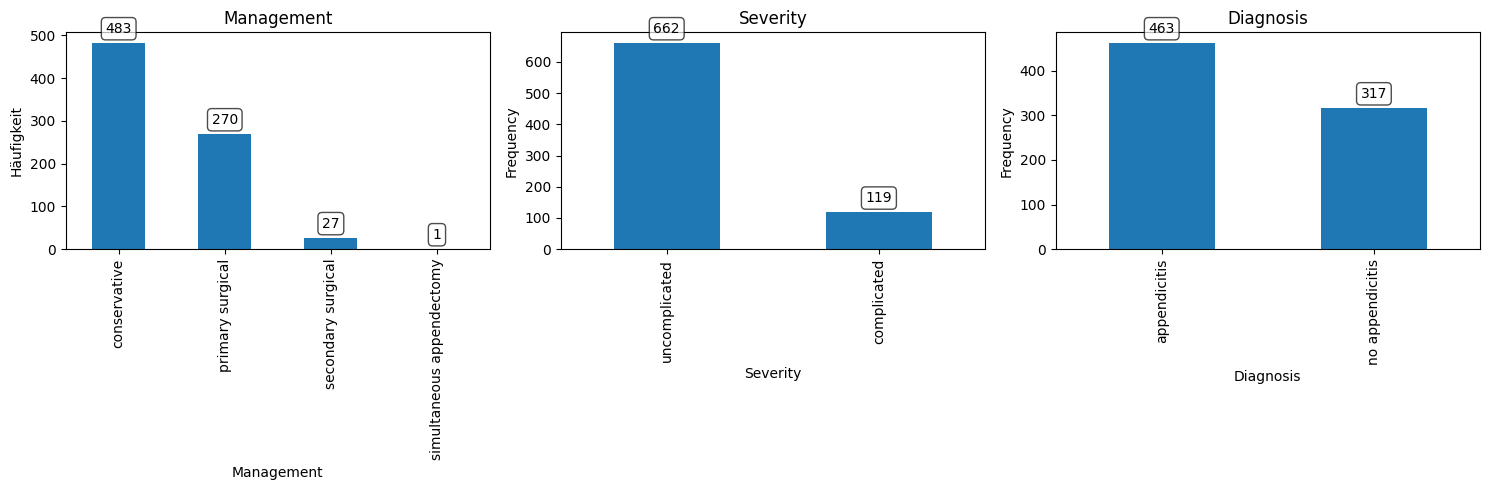

In [8]:
#Show the frequency of parameters from the target variables
import matplotlib.pyplot as plt

#Create bar charts
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

#Function to display the number above the bar
def add_value_labels(ax, spacing=5):
    """Adds labels to the bars in a bar chart."""
    for container in ax.containers:
        ax.bar_label(container, labels=[f'{v.get_height()}' for v in container], padding=spacing, bbox={"boxstyle": "round,pad=0.3", "facecolor": "white", "edgecolor": "black", "alpha": 0.7})

#Bar chart for "Management"
management_counts = target["Management"].value_counts()
management_counts.plot(kind='bar', ax=axs[0])
axs[0].set_title("Management")
axs[0].set_ylabel("Häufigkeit")
axs[0].set_xlabel("Management")
add_value_labels(axs[0])

#Bar chart for "Severity"
severity_counts = target["Severity"].value_counts()
severity_counts.plot(kind='bar', ax=axs[1])
axs[1].set_title("Severity")
axs[1].set_ylabel("Frequency")
axs[1].set_xlabel("Severity")
add_value_labels(axs[1])

#Bar chart for "Diagnosis"
diagnosis_counts = target["Diagnosis"].value_counts()
diagnosis_counts.plot(kind='bar', ax=axs[2])
axs[2].set_title("Diagnosis")
axs[2].set_ylabel("Frequency")
axs[2].set_xlabel("Diagnosis")
add_value_labels(axs[2])

plt.tight_layout()
plt.show()

- Our desired target variable "Diagnosis" has two unique characteristics: "appendicitis" and "no appendicitis".
- A relatively even distribution of the two characteristics of the target variable "Diagnosis" can be observed, with 463 cases of appendicitis and 317 instances where the condition was not diagnosed.

Now we take a look at the missing values of the features and target variable "Diagnosis".

In [9]:
#Show the number of missing values for the features
missing_values = features.isnull().sum()
print(missing_values.sort_values(ascending=False))

Conglomerate_of_Bowel_Loops         739
Segmented_Neutrophils               728
Ileus                               722
Perfusion                           719
Enteritis                           716
Appendicolith                       713
Coprostasis                         711
Perforation                         701
Appendicular_Abscess                697
Bowel_Wall_Thickening               683
Target_Sign                         644
Meteorism                           642
Pathological_Lymph_Nodes            579
Appendix_Wall_Layers                564
Surrounding_Tissue_Reaction         530
Appendix_Diameter                   284
RBC_in_Urine                        206
Ketones_in_Urine                    200
WBC_in_Urine                        199
Ipsilateral_Rebound_Tenderness      163
Neutrophil_Percentage               103
Free_Fluids                          63
Paedriatic_Appendicitis_Score        52
Alvarado_Score                       52
Neutrophilia                         50


Some of the features have a very high number of missing values. To avoid excessive distortions, the affected features should be removed.

In [10]:
#Identification and deletion of columns with less than 300 values.
missing_values = features.isnull().sum()
nan_threshold = 300 
empty_values = missing_values[missing_values > nan_threshold]

column_values = empty_values.index.tolist()

print("Shape of the features before removing missing values:", features.shape)
features = features.drop(columns=column_values)
features.shape
print("Shape of the features after removing missing values:", features.shape)

Shape of the features before removing missing values: (782, 49)
Shape of the features after removing missing values: (782, 34)


In [11]:
#Identification of empty values our desired target variable "diagnosis"

#Define target with the specified columns
target = data[["Diagnosis"]]

#Get missing values
missing_target_values = target.isnull().sum()
missing_target_values

Diagnosis    2
dtype: int64

There are 2 empty lines in our desired target variable "diagnosis". These should be deleted to ensure data integrity

In [12]:
#Remove rows with missing values in the "Diagnosis" column
target = target.dropna(subset=["Diagnosis"])
valid_indices = target.index
features = features.loc[valid_indices]
missing_target_values = target.isnull().sum()
missing_target_values

Diagnosis    0
dtype: int64

In order to continue the exploratory data analysis and identify the relevant variables for predicting "diagnosis", we will now process the data further.

In [13]:
#Split data to prevent data leakage
from sklearn.model_selection import train_test_split

#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

In [14]:
#Impute the remaining missing data of the features (The target variable does not need to be imputed, as the missing values have already been removed.)

from sklearn.impute import SimpleImputer

#Identification of numerical and categorical features
categorical_columns = features.select_dtypes(include=['object']).columns
numerical_columns = features.select_dtypes(exclude=['object']).columns

#Create the SimpleImputer for numerical and categorical data
numerical_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')

#Apply the imputer to training and test data
X_train[numerical_columns] = pd.DataFrame(
numerical_imputer.fit_transform(X_train[numerical_columns]),index=X_train.index, columns=numerical_columns)

X_test[numerical_columns] = pd.DataFrame(
numerical_imputer.transform(X_test[numerical_columns]),index=X_test.index, columns=numerical_columns)

X_train[categorical_columns] = pd.DataFrame(
categorical_imputer.fit_transform(X_train[categorical_columns]),index=X_train.index, columns=categorical_columns)

X_test[categorical_columns] = pd.DataFrame(
categorical_imputer.transform(X_test[categorical_columns]),index=X_test.index, columns=categorical_columns)


In [15]:
#Encode features

from sklearn.preprocessing import StandardScaler, OneHotEncoder

# One-Hot-Encoding categorical variables
one_hot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='error')

encoded_values_train = pd.DataFrame(one_hot_encoder.fit_transform(X_train[categorical_columns]), 
                                    index=X_train.index, 
                                    columns=one_hot_encoder.get_feature_names_out())

encoded_values_test = pd.DataFrame(one_hot_encoder.transform(X_test[categorical_columns]), 
                                   index=X_test.index, 
                                   columns=one_hot_encoder.get_feature_names_out())


In [16]:
#Scale features

# StandardScaler numerical columns
scaler = StandardScaler()
scaled_values_train = pd.DataFrame(scaler.fit_transform(X_train[numerical_columns]),
                                    index=X_train.index,
                                    columns=scaler.get_feature_names_out())

scaled_values_test = pd.DataFrame(scaler.transform(X_test[numerical_columns]),
                                    index=X_test.index,
                                    columns=scaler.get_feature_names_out())

In [17]:
#Merge features

#Add imputed data
X_train.drop(categorical_columns, axis=1, inplace=True)
X_train = pd.concat([X_train, encoded_values_train], axis=1)

X_test.drop(categorical_columns, axis=1, inplace=True)
X_test = pd.concat([X_test, encoded_values_test], axis=1)

X_train.drop(numerical_columns, axis=1, inplace=True)
X_train = pd.concat([X_train, scaled_values_train], axis=1)

X_test.drop(numerical_columns, axis=1, inplace=True)
X_test = pd.concat([X_test, scaled_values_test], axis=1)


In [18]:
#Convert target variable to numeric format
y_train = y_train.replace({'no appendicitis': 0, 'appendicitis': 1})
y_test = y_test.replace({'no appendicitis': 0, 'appendicitis': 1})

/tmp/ipykernel_9731/4255469384.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_train = y_train.replace({'no appendicitis': 0, 'appendicitis': 1})
/tmp/ipykernel_9731/4255469384.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test = y_test.replace({'no appendicitis': 0, 'appendicitis': 1})


We now do an L1-regularized logistic regression model to identify the top features.

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Flatten y_train to ensure it is a 1D array
y_train_flat = y_train.values.ravel() if isinstance(y_train, pd.DataFrame) else y_train

# Create and train a logistic regression model with L1 regularization (Lasso)
model = LogisticRegression(penalty='l1', solver='liblinear', max_iter=100)
model.fit(X_train, y_train_flat)

# Display coefficients
coefficients = pd.DataFrame(model.coef_.T, index=X_train.columns, columns=['Coefficient'])

# Sort coefficients by their absolute value and select the top 10
top_10_coefficients = coefficients.reindex(coefficients['Coefficient'].abs().sort_values(ascending=False).index).head(10)

# Make predictions
y_pred = model.predict(X_test)

# Display the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display top 10 significant coefficients
print("Top 10 significant features:")
print(top_10_coefficients)


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87        62
           1       0.92      0.89      0.91        94

    accuracy                           0.89       156
   macro avg       0.88      0.89      0.89       156
weighted avg       0.89      0.89      0.89       156

Top 10 significant features:
                                      Coefficient
Appendix_on_US_yes                       3.531354
Appendix_Diameter                        3.306604
US_Performed_no                          2.613489
Appendix_on_US_no                       -1.772396
Peritonitis_no                          -1.689341
CRP                                      0.964469
Free_Fluids_yes                          0.634269
Alvarado_Score                           0.626788
Contralateral_Rebound_Tenderness_yes     0.529937
Coughing_Pain_yes                        0.441052


Here we use SHAP to visualize the most important features affecting the predictions.

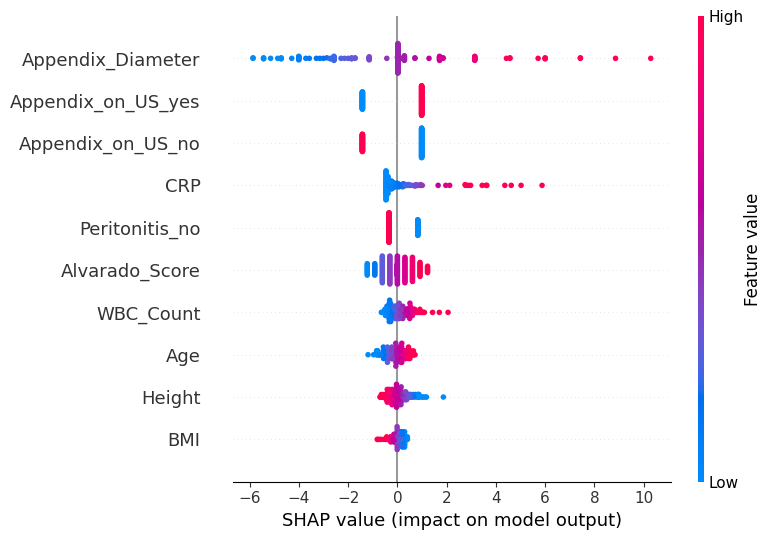

In [20]:
import shap
import numpy as np

# Create a logistic regression model
model = LogisticRegression()

# Convert y_train to a NumPy array and then use ravel() to reshape it
y_train_array = y_train.values.ravel()

# Train the model
model.fit(X_train, y_train_array)

# Create a SHAP Explainer
explainer = shap.LinearExplainer(model, X_train)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test)

# SHAP Summary Plot
shap.summary_plot(shap_values, X_test, max_display=10)


In [21]:
# List of significant SHAP features

shap_df = pd.DataFrame(shap_values, columns=X_test.columns)
mean_shap_values = shap_df.abs().mean().sort_values(ascending=False)

# Threshold based on the specified percentile (90th percentile)
threshold = mean_shap_values.quantile(0.90)

# Select significant features based on the threshold (top 10% of SHAP values)
significant_shap_features = mean_shap_values[mean_shap_values > threshold]
print("Significant SHAP Features:")
print(significant_shap_features)

Significant SHAP Features:
Appendix_Diameter     1.834772
Appendix_on_US_yes    1.147299
Appendix_on_US_no     1.147218
CRP                   0.632598
Peritonitis_no        0.508441
Alvarado_Score        0.507326
WBC_Count             0.351388
dtype: float64


Here we tune a Decision Tree Classifier in order to identify significant features.

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Create a decision tree classifier
model = DecisionTreeClassifier(random_state=42)

# Define hyperparameter grid
param_grid = {
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Apply GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Extract the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Make predictions and evaluate
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

# Determine the depth of the best tree
best_tree_depth = best_model.get_depth()
print(f"The depth of the best decision tree is: {best_tree_depth}")

# Determine feature importance
feature_importances = best_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)

# Select significant features (e.g., the top 3 features)
significant_features = importance_df[importance_df['Importance'] > 0.05]  # Threshold can be adjusted
print(significant_features)


Fitting 5 folds for each of 90 candidates, totalling 450 fits


[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=2; total time=   0.0s[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=2; total time=   0.0s

[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=2; total time=   0.0s[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=2; total time=   0.0s

[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_d

- Based on the methods used to analyze the key features, we identify the features "Appendix_Diameter", "Alvarado_Score", "CRP" and "Appendix_on_US" as relevant for diagnosis prediction.
- We will test these manually selected features in the pipelines. Furthermore, we will test an automatic feature selection method within the pipelines and compare the results. If it turns out that the automatic feature selection provides better results, we will favor this approach over the manual feature selection.